# Sandbox Presentation - Ulmo Package

By Heather Turcios

## Section 1: Gathering Data

This section is to get all the data necessary to create my graphs. We need to do this by importing all packages needed, finding the API needed and creating a dataframe of the data. 

In [1]:
#Import Packages that are Needed
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import ulmo

I am using the CUASHI API to access the Snotel Data. CUASHI is a beta site that has an API that can be used to grab data from Snotel since there is no way to download data from Snotel directly. Snotel is a website from the USDA that has an interactive map that visualizes climate data from different stations across the US. Snotel helps snow data from things like depth, snow water equvalent, and even snow density.

In [2]:
#This is the latest CUAHSI API endpoint
wsdlurl = 'https://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

The Ulmo package is used to creat a dataframe of the Snotel data. This package provides an easy and clean way to access public hydrology and climatology data like Snotel. It is compatible with numpy and pandas which means we can create a pandas dataframe from the data we pulled from using the API and ulmo.

In [3]:
#Creating a data frame of the Snotel Data
sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
sites_df.head()

code            name network  \
SNOTEL:301_CA_SNTL    301_CA_SNTL        Adin Mtn  SNOTEL   
SNOTEL:907_UT_SNTL    907_UT_SNTL     Agua Canyon  SNOTEL   
SNOTEL:916_MT_SNTL    916_MT_SNTL      Albro Lake  SNOTEL   
SNOTEL:1267_AK_SNTL  1267_AK_SNTL  Alexander Lake  SNOTEL   
SNOTEL:908_WA_SNTL    908_WA_SNTL  Alpine Meadows  SNOTEL   

                                                              location  \
SNOTEL:301_CA_SNTL   {'latitude': '41.2358283996582', 'longitude': ...   
SNOTEL:907_UT_SNTL   {'latitude': '37.522171020507813', 'longitude'...   
SNOTEL:916_MT_SNTL   {'latitude': '45.59722900390625', 'longitude':...   
SNOTEL:1267_AK_SNTL  {'latitude': '61.749668121337891', 'longitude'...   
SNOTEL:908_WA_SNTL   {'latitude': '47.779571533203125', 'longitude'...   

                            elevation_m  \
SNOTEL:301_CA_SNTL   1886.7120361328125   
SNOTEL:907_UT_SNTL    2712.719970703125   
SNOTEL:916_MT_SNTL    2529.840087890625   
SNOTEL:1267_AK_SNTL  48.768001556396484   
SNOTEL:908_WA_SNTL    1066.800048828125   

                                                         site_property  
SNOTEL:301_CA_SNTL   {'county': 'Modoc', 'state': 'California', 'si...  
SNOTEL:907_UT_SNTL   {'county': 'Kane', 'state': 'Utah', 'site_comm...  
SNOTEL:916_MT_SNTL   {'county': 'Madison', 'state': 'Montana', 'sit...  
SNOTEL:1267_AK_SNTL  {'county': 'Matanuska-Susitna', 'state': 'Alas...  
SNOTEL:908_WA_SNTL   {'county': 'King', 'state': 'Washington', 'sit...

The above dataframe displays what we pulled from Snotel using Ulmo. For my final project I will displaying the data on the map so I will need to convert the longitude and latitude to geometries in a new column.

## Section 2: Cleaning Data

In [4]:
#Creating a column in the dataframe for geometry based off location
sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Now that we have geometries, we can remove the location column and covert the elevations to floats so it reads properly

In [5]:
#Dropping the location data frame from the original dataframe and adjusting the elevation column to a float
sites_df = sites_df.drop(columns='location')
sites_df = sites_df.astype({"elevation_m":float})

In [6]:
#Checking to see if changes worked and resetting index
sites_df.reset_index()

index          code              name network  elevation_m  \
0     SNOTEL:301_CA_SNTL   301_CA_SNTL          Adin Mtn  SNOTEL  1886.712036   
1     SNOTEL:907_UT_SNTL   907_UT_SNTL       Agua Canyon  SNOTEL  2712.719971   
2     SNOTEL:916_MT_SNTL   916_MT_SNTL        Albro Lake  SNOTEL  2529.840088   
3    SNOTEL:1267_AK_SNTL  1267_AK_SNTL    Alexander Lake  SNOTEL    48.768002   
4     SNOTEL:908_WA_SNTL   908_WA_SNTL    Alpine Meadows  SNOTEL  1066.800049   
..                   ...           ...               ...     ...          ...   
925   SNOTEL:877_AZ_SNTL   877_AZ_SNTL     Workman Creek  SNOTEL  2103.120117   
926  SNOTEL:1228_UT_SNTL  1228_UT_SNTL     Wrigley Creek  SNOTEL  2842.869629   
927  SNOTEL:1197_UT_SNTL  1197_UT_SNTL  Yankee Reservoir  SNOTEL  2649.321533   
928   SNOTEL:878_WY_SNTL   878_WY_SNTL       Younts Peak  SNOTEL  2545.080078   
929  SNOTEL:1033_CO_SNTL  1033_CO_SNTL            Zirkel  SNOTEL  2846.832031   

                                         site_property  \
0    {'county': 'Modoc', 'state': 'California', 'si...   
1    {'county': 'Kane', 'state': 'Utah', 'site_comm...   
2    {'county': 'Madison', 'state': 'Montana', 'sit...   
3    {'county': 'Matanuska-Susitna', 'state': 'Alas...   
4    {'county': 'King', 'state': 'Washington', 'sit...   
..                                                 ...   
925  {'county': 'Gila', 'state': 'Arizona', 'site_c...   
926  {'county': 'Sanpete', 'state': 'Utah', 'site_c...   
927  {'county': 'Iron', 'state': 'Utah', 'site_comm...   
928  {'county': 'Park', 'state': 'Wyoming', 'site_c...   
929  {'county': 'Jackson', 'state': 'Colorado', 'si...   

                                           geometry  
0      POINT (-120.79192352294922 41.2358283996582)  
1     POINT (-112.27117919921875 37.52217102050781)  
2     POINT (-111.95902252197266 45.59722900390625)  
3     POINT (-150.88966369628906 61.74966812133789)  
4    POINT (-121.69847106933594 47.779571533203125)  
..                                              ...  
925   POINT (-110.91773223876953 33.81241989135742)  
926   POINT (-111.35684967041016 39.13233184814453)  
927   POINT (-112.77494812011719 37.74797058105469)  
928     POINT (-109.8177490234375 43.9322509765625)  
929   POINT (-106.59535217285156 40.79487991333008)  

[930 rows x 7 columns]

For my project, I chose to focus on the Lake Tahoe area. The stations that I chose were:
- Fallen Leaf
- Heavenly Valley
- Little Valley
- Mariette Lake
- Rubicon
- Tahoe City

I need to select the data for each individual station from the original data pulled from Snotel and create it's own station dataframe.

In [7]:
#Choosing the station I want to pull from the original data frame
selection_fallen_leaf = ['Fallen Leaf']

#Locating the row and data for the individual station needed
fallen_leaf_data = sites_df.loc[sites_df['name'].isin(selection_fallen_leaf)]
fallen_leaf_data.reset_index()

index         code         name network  elevation_m  \
0  SNOTEL:473_CA_SNTL  473_CA_SNTL  Fallen Leaf  SNOTEL  1902.561646   

                                       site_property  \
0  {'county': 'El Dorado', 'state': 'California',...   

                                        geometry  
0  POINT (-120.05449676513672 38.93402862548828)

## Section 3: Creating Function of Present Time

To ensure we collected data up today's date, we created "today" to query the newest date. We then created a function below was created to query monthly data starting from Jan. 1, 2000 from Snotel. We used the ulmo package again to get the Snotel data and then had the data converted to a pandas dataframe while renaming the varible codes from the original Snotel data to "values" in the pandas dataframe. There was also a column for dates and times, so we broke down the dates and time to a datetime in UTC for the dataframe and set the dates as the index. Lastly, the values were converted to floats, NANs were changed to -9999 and then removed. 

In [8]:
#Get current datetime
today = datetime.today().strftime('%Y-%m-%d')

#Querying monthly snow data, but maybe you want daily, that would be ''SNOTEL:SNWD_D''


def snotel_fetch(sitecode, variablecode='SNOTEL:SNWD_m', start_date='2000-01-01', end_date=today):
    #print(sitecode, variablecode, start_date, end_date)
    values_df = None
    try:
        #Request data from the server
        site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
        #Convert to a Pandas DataFrame   
        values_df = pd.DataFrame.from_dict(site_values['values'])
        #Parse the datetime values to Pandas Timestamp objects
        values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
        #Set the DataFrame index to the Timestamps
        values_df = values_df.set_index('datetime')
        #Convert values to float and replace -9999 nodata values with NaN
        values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
        #Remove any records flagged with lower quality
        values_df = values_df[values_df['quality_control_level_code'] == '1']
    except:
        print("Unable to fetch %s" % variablecode)

    return values_df

## Section 4: Adding Present Time to Data

In [9]:
#Choosing the stations needed for final project area
fallen_leaf = snotel_fetch('SNOTEL:473_CA_SNTL')
heavenly_valley = snotel_fetch('SNOTEL:518_CA_SNTL')
little_valley = snotel_fetch('SNOTEL:1242_NV_SNTL')
mariette_lake = snotel_fetch('SNOTEL:615_NV_SNTL')
rubicon = snotel_fetch('SNOTEL:724_CA_SNTL')
tahoe_city = snotel_fetch('SNOTEL:809_CA_SNTL')

After fetching the data from Snotel and selecting my stations, I ensured to rename the columns to make sense to the data that was being used.

In [10]:
heavenly_valley = heavenly_valley.rename(columns={'value': 'Snow Depth (in)'})
little_valley = little_valley.rename(columns={'value': 'Snow Depth (in)'})
mariette_lake = mariette_lake.rename(columns={'value': 'Snow Depth (in)'})
rubicon = rubicon.rename(columns={'value': 'Snow Depth (in)'})
tahoe_city = tahoe_city.rename(columns={'value': 'Snow Depth (in)'})

In [11]:
fallen_leaf = fallen_leaf.rename(columns={'value': 'Snow Depth (in)'})
fallen_leaf

Snow Depth (in) qualifiers censor_code  \
datetime                                                            
2000-09-01 00:00:00+00:00                0          E          nc   
2000-10-01 00:00:00+00:00                0          E          nc   
2000-11-01 00:00:00+00:00                0          E          nc   
2000-12-01 00:00:00+00:00                4          V          nc   
2001-01-01 00:00:00+00:00                2          V          nc   
...                                    ...        ...         ...   
2022-12-01 00:00:00+00:00                6          V          nc   
2023-01-01 00:00:00+00:00               43          V          nc   
2023-02-01 00:00:00+00:00               44          V          nc   
2023-03-01 00:00:00+00:00               82          E          nc   
2023-04-01 00:00:00+00:00               60          V          nc   

                                 date_time_utc method_id method_code  \
datetime                                                               
2000-09-01 00:00:00+00:00  2000-09-01T00:00:00         0           0   
2000-10-01 00:00:00+00:00  2000-10-01T00:00:00         0           0   
2000-11-01 00:00:00+00:00  2000-11-01T00:00:00         0           0   
2000-12-01 00:00:00+00:00  2000-12-01T00:00:00         0           0   
2001-01-01 00:00:00+00:00  2001-01-01T00:00:00         0           0   
...                                        ...       ...         ...   
2022-12-01 00:00:00+00:00  2022-12-01T00:00:00         0           0   
2023-01-01 00:00:00+00:00  2023-01-01T00:00:00         0           0   
2023-02-01 00:00:00+00:00  2023-02-01T00:00:00         0           0   
2023-03-01 00:00:00+00:00  2023-03-01T00:00:00         0           0   
2023-04-01 00:00:00+00:00  2023-04-01T00:00:00         0           0   

                          source_code quality_control_level_code  
datetime                                                          
2000-09-01 00:00:00+00:00           1                          1  
2000-10-01 00:00:00+00:00           1                          1  
2000-11-01 00:00:00+00:00           1                          1  
2000-12-01 00:00:00+00:00           1                          1  
2001-01-01 00:00:00+00:00           1                          1  
...                               ...                        ...  
2022-12-01 00:00:00+00:00           1                          1  
2023-01-01 00:00:00+00:00           1                          1  
2023-02-01 00:00:00+00:00           1                          1  
2023-03-01 00:00:00+00:00           1                          1  
2023-04-01 00:00:00+00:00           1                          1  

[272 rows x 8 columns]

## Section 5: Graphing Data

Using the values of snow per month, I used plotyly express to create a date-time plot to show the data for each station chosen around Lake Tahoe. It is interactive to hover over each part of the graph to show the month, year, and snow depth in inches.

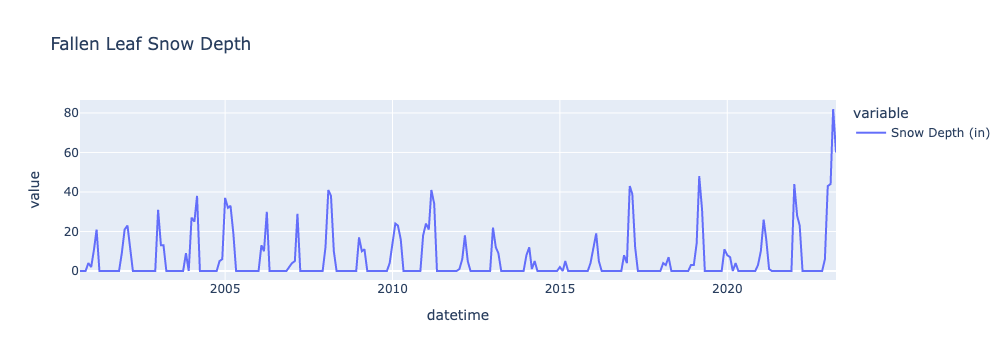

In [12]:
import plotly_express as px
fig_fl = px.line(fallen_leaf, x=fallen_leaf.index, y=['Snow Depth (in)'], title="Fallen Leaf Snow Depth")
fig_fl.show()

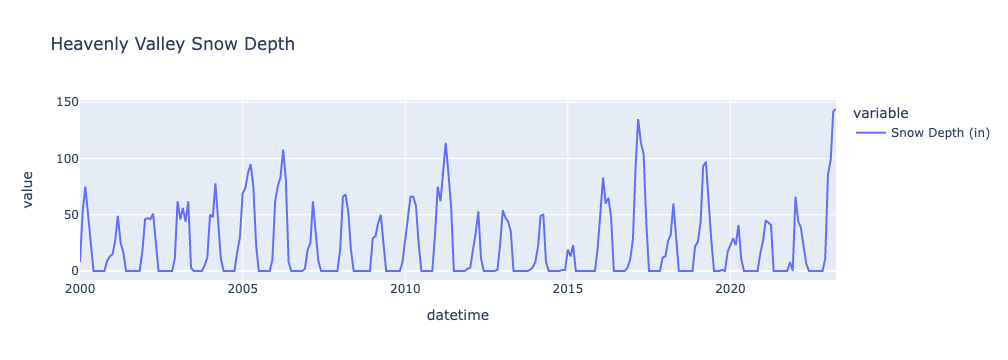

In [13]:
fig_hv = px.line(heavenly_valley, x=heavenly_valley.index, y=['Snow Depth (in)'], title="Heavenly Valley Snow Depth")
fig_hv.show()

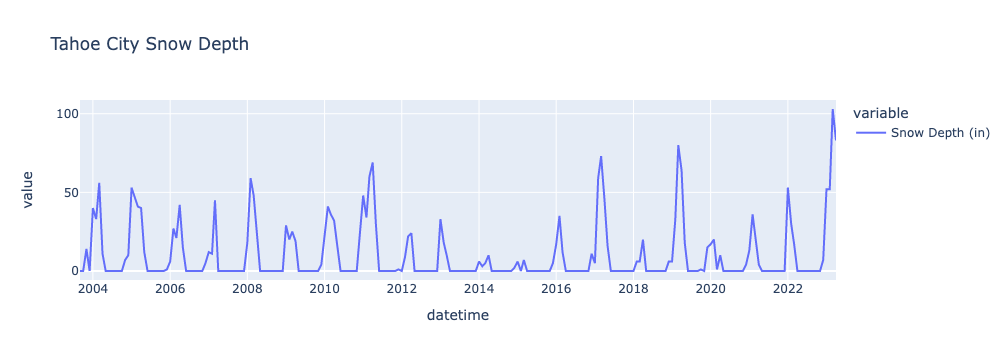

In [14]:
fig_tc = px.line(tahoe_city, x=tahoe_city.index, y=['Snow Depth (in)'], title="Tahoe City Snow Depth")
fig_tc.show()